# Inaugural Project

Imports and set magics:

In [1]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# Autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

We illustrate how $H_F/H_M$ changes when varying $α ∈ \{0.25, 0.50, 0.75\}$ and $σ = \{0.5, 1.0, 1.5\}$. We assume that choice set is discrete.

In [2]:
# Model 
model = inauguralproject.HouseholdSpecializationModelClass()

# First we define a list for alpha and sigma in the range that we want to examine
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5,1.0,1.5]

# Using the list of values we create a loop such that we test for all values of alpha and all values of sigma together 
for alpha in alpha_list:
    for sigma in sigma_list:
        # Assigning the values of alpha and sigma to our model
        model.par.alpha = alpha
        model.par.sigma = sigma

# Using our solve model for discrete time
        opt = model.solve_discrete()
        
# Printing the results
        print(f'alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}')

/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:67: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:72: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


alpha = 0.25, sigma = 0.50 -> HF/HM = 3.00/5.50 = 0.55
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 1.50/7.00 = 0.21
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 5.50/3.00 = 1.83
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 7.00/1.50 = 4.67


When α is 0.5, then wage rate for females and males is the same, and the women and men will work the same amount of time in household production. When α increases, then women's hours working at home increases compared to men's across all sigmas.

# Question 2

We plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F ∈ [0.8, 0.9, 1.0, 1.1, 1.2]$.

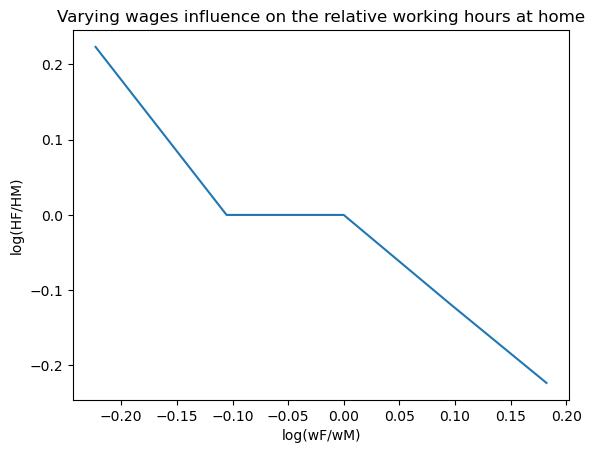

In [3]:
# Model
model = inauguralproject.HouseholdSpecializationModelClass()

# Define the vector for the wage rates
wf = model.par.wF_vec

# We then create an empty list to store the results of the optimal labour supply
q2_ratio = np.zeros_like(wf)

# We create a loop over the wages and find the optimal labour supply for each wage
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    q2_ratio[i] = ratio

# Creating a plot of the results
plt.plot(np.log(wf), np.log(q2_ratio))
plt.xlabel("log(wF/wM)")
plt.ylabel("log(HF/HM)")
plt.title("Varying wages influence on the relative working hours at home")

plt.show()

In the model, females and males are equally productive in domestic labour and their work is completely substitutable bacause of $α=0.5$ and $σ=1$. The graph illustrates, when women's wages increases relative to men, then women's share of hours working at home decreases. 
When wages are between 0.9 and 1.0, there is no difference in the relative household hours.

# Question 3

We plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F ∈ [0.8, 0.9, 1.0, 1.1, 1.2]$. We now assume that the choice set is continuous, i.e.
$L_M,L_F,H_M,H_F ∈ [0, 24]$

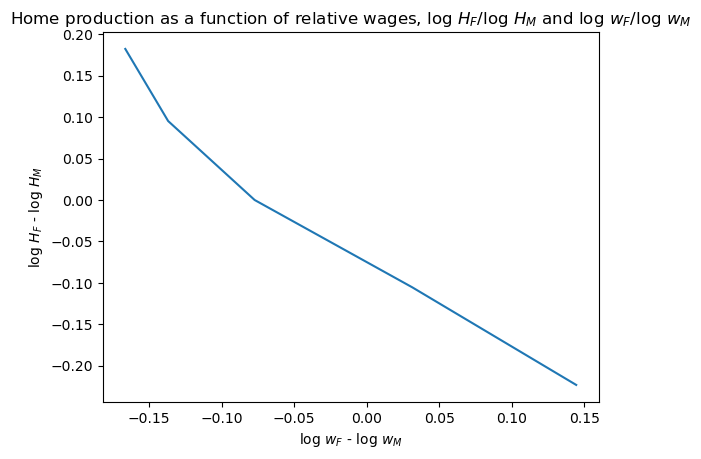

In [4]:
# Assigning the values of alpha and sigma to our model
model.par.alpha = 0.5
model.par.sigma = 1

# Set the values for wF
wF_parameter = [0.8, 0.9, 1.0, 1.1, 1.2]

# Creation of two NumPy one-dimensional array with five elements and assigns it to the variables HFHM_n and wFwM_n
HFHM_n = np.empty(5)
wFwM_n = np.empty(5)

# Creation of a loop that iterates over each element in model.par.wF_vec, which makes a list of wF values used in the optimization 
# For each wF value, it sets the wF attribute in the par attribute of the model object to that value, solves the optimization
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    # The values are saved as the log of the variables
    HFHM_n[i] = np.log(opt.HF/opt.HM)
    wFwM_n[i] = np.log(model.par.wF/model.par.wM)
        
# Plotting log HF/HM against log wF/wF 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Home production as a function of relative wages, log $H_F$/log $H_M$ and log $w_F$/log $w_M$')
ax.plot(HFHM_n, wFwM_n)
ax.set_xlabel("log $w_F$ - log $w_M$")
ax.set_ylabel("log $H_F$ - log $H_M$")
plt.show()

The graph illustrates the correlation between the natural logarithm of the ratio of wages for females to males (on the x-axis) and the natural logarithm of the ratio of hours worked from home for females to males (on the y-axis) when the choice set is continuous.

The graph indicates an inverse association between the natural logarithm of the ratio of wages for females to males and the natural logarithm of the ratio of hours worked from home for females to males. This implies that when the ratio of wages for females to males increases, the ratio of hours worked from home for females to males decreases. This finding is predictable, as a comparatively higher wage for females will offer an incentive for them to work rather than carry out household activities.

# Question 4


We run the following regression on time use data of couples:

$$log\frac{H_F}{H_M}\ = β_0+β_1log\frac{w_F}{w_M}\$$
 
We choose α and σ such it minimizes $(β_0-\hat{β}_0)^2 + (β_1-\hat{β}_1)^2$. Afterwards, we illustrate how the model fit the data and create a plot with $log H_F/H_M$ against $log w_F/w_M$.



/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:67: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:67: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.9839273201856493
sigma = 0.09830109724352809


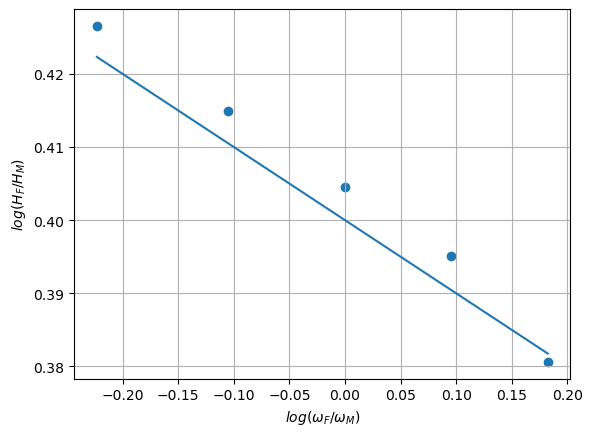

In [5]:
# Estimate the optimal alpha and sigma 
model.estimate()

# Find the log H ratio 
logH_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating the figure 
fig = plt.figure()

# Creating the plot
ax = fig.add_subplot(1,1,1)
# Regression from the model 
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))
# The 'log_H_ratio' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),logH_ratio)

# Making alterations to the figure
ax.grid()
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')
plt.show()

The model chooses $α=0.0.9839273201856493$ which means that females are more effective in the home production than males. In addition to this, the model selects $σ=0.09830109724352809$. which indicates that the substitution between female and male labor is close to zero. Therefore, the home production cannot be replaced as easily from females to males.

The model shows with the positive $β_0$ $(0.4)$ that the females do the most of the home production compared to males. Nonetheless, the negative $β_1$ $(-0.1)$ does imply that if the female's wage rises in relation to the male's wage, the gap in domestic decreases. 

In the figure, the positive values on the y-axis indicates that females do the largest part of the domestic labor regardless of the ratio of wages. 

